In [19]:
%matplotlib inline

import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [20]:
input_file = "../data/raw/ETTm2.csv"
#output_path = "../../data/synthetic_fishing/"


In [21]:
full_data = pd.read_csv(input_file, index_col=0)


In [22]:
# Check for NaN or null values in the dataset
nan_summary = full_data.isnull().sum()

# Total number of NaN values in the dataset
total_nan = full_data.isnull().sum().sum()

# Display columns with NaN values and their counts
print("NaN Counts Per Column:")
print(nan_summary[nan_summary > 0])  # Show only columns with NaN values

print(f"\nTotal number of NaN values in the dataset: {total_nan}")


NaN Counts Per Column:
Series([], dtype: int64)

Total number of NaN values in the dataset: 0


In [23]:
#full_data = full_data.fillna(0).dropna()
full_data = full_data.dropna()


In [24]:
full_data.describe()


,HUFL,HULL,MUFL,MULL,LUFL,LULL,conso
count,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000,17420.000000
mean,37.193346,8.537565,43.830356,8.322694,-3.423605,-2.085969,26.609376
std,10.218855,6.020442,13.056798,4.366059,6.144403,6.012796,11.888266
min,0.000000,-18.680000,11.205000,-6.594000,-14.350000,-31.462000,-2.646500
25%,30.156000,4.523000,37.394001,5.683000,-9.254000,-2.505000,16.469500
50%,37.193001,9.131000,41.388000,9.302000,-3.774000,-1.226000,26.577000
75%,44.062000,13.152000,46.078999,11.258000,2.527000,0.000000,35.585999
max,107.892998,36.438999,93.230003,28.736000,17.218000,2.932000,58.876999


In [25]:
full_data.columns


Index(['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'conso'], dtype='object')

In [26]:
full_data.info


<bound method DataFrame.info of                           HUFL    HULL       MUFL    MULL    LUFL   LULL  \
date                                                                       
2016-07-01 00:00:00  41.130001  12.481  36.535999   9.355   4.424  1.311   
2016-07-01 01:00:00  37.528000  10.136  33.936001   7.532   4.435  1.215   
2016-07-01 02:00:00  37.946999  11.309  35.330002   9.007   2.100  0.000   
2016-07-01 03:00:00  38.952000  11.895  35.543999   9.436   3.380  1.215   
2016-07-01 04:00:00  38.113998  11.476  35.410000   9.623   2.036  0.000   
...                        ...     ...        ...     ...     ...    ...   
2018-06-26 15:00:00  39.202999  11.392  49.644001  11.929 -10.331 -1.258   
2018-06-26 16:00:00  38.113998  10.974  48.759998  11.366 -10.331 -1.290   
2018-06-26 17:00:00  39.622002  10.974  50.609001  11.661 -11.557 -1.418   
2018-06-26 18:00:00  43.643002  13.403  54.737000  13.778 -10.299 -1.418   
2018-06-26 19:00:00  38.868000  10.052  49.859001  10.66

In [27]:
full_data.head()


,HUFL,HULL,MUFL,MULL,LUFL,LULL,conso
date,,,,,,,
2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
2016-07-01 02:00:00,37.946999,11.309,35.330002,9.007,2.100,0.000,36.465000
2016-07-01 03:00:00,38.952000,11.895,35.543999,9.436,3.380,1.215,33.608501
2016-07-01 04:00:00,38.113998,11.476,35.410000,9.623,2.036,0.000,31.850500


In [28]:
full_data.tail()


,HUFL,HULL,MUFL,MULL,LUFL,LULL,conso
date,,,,,,,
2018-06-26 15:00:00,39.202999,11.392,49.644001,11.929,-10.331,-1.258,47.084999
2018-06-26 16:00:00,38.113998,10.974,48.759998,11.366,-10.331,-1.290,48.183498
2018-06-26 17:00:00,39.622002,10.974,50.609001,11.661,-11.557,-1.418,48.183498
2018-06-26 18:00:00,43.643002,13.403,54.737000,13.778,-10.299,-1.418,46.865501
2018-06-26 19:00:00,38.868000,10.052,49.859001,10.669,-11.525,-1.418,45.986500


In [29]:
df = full_data.copy()


In [30]:
l, sh, dim, siz = len(df), df.shape, df.ndim, df.size


In [31]:
print(l, sh, dim, siz)


17420 (17420, 7) 2 121940


In [32]:
rdf = df.to_numpy().reshape(df.shape[0], df.shape[1], 1)
rdf.shape


(17420, 7, 1)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

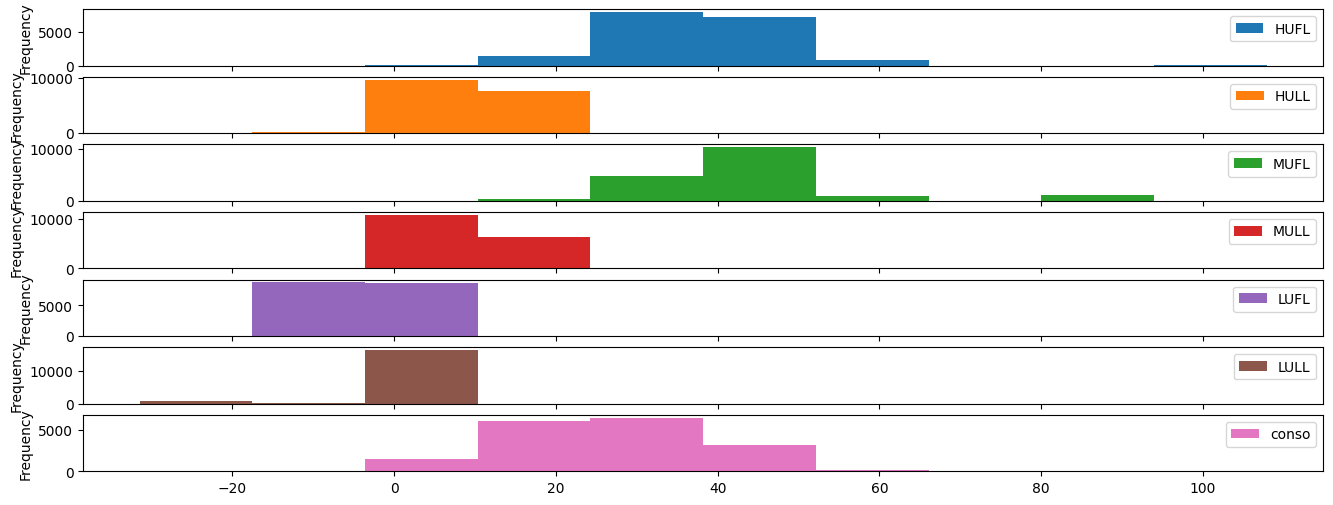

In [33]:
df.plot(kind='hist', subplots=True, figsize=(16, 6))


array([[<Axes: title={'center': 'HUFL'}>,
        <Axes: title={'center': 'HULL'}>,
        <Axes: title={'center': 'MUFL'}>],
       [<Axes: title={'center': 'MULL'}>,
        <Axes: title={'center': 'LUFL'}>,
        <Axes: title={'center': 'LULL'}>],
       [<Axes: title={'center': 'conso'}>, <Axes: >, <Axes: >]],
      dtype=object)

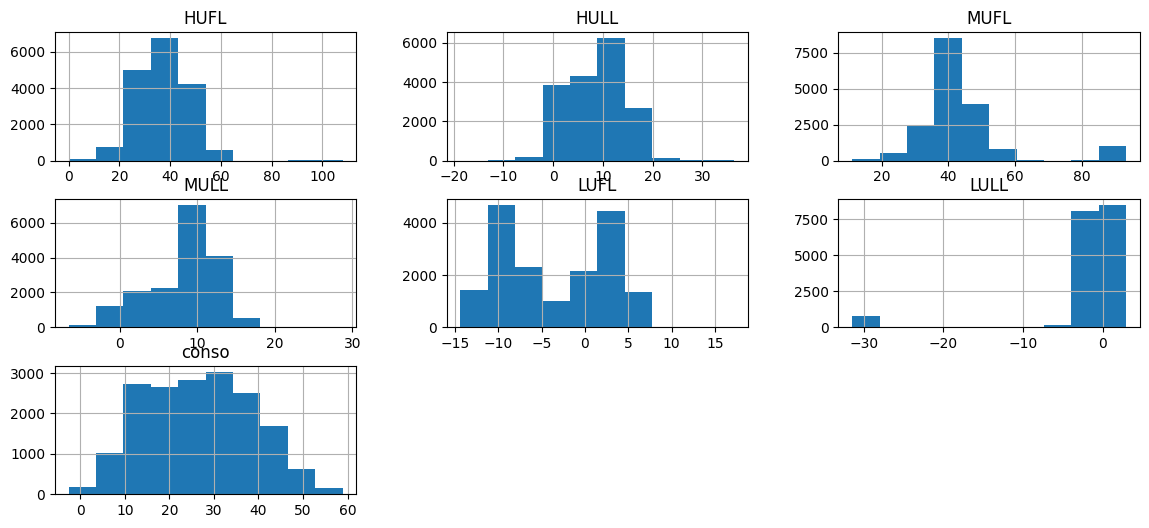

In [34]:
df.hist(figsize=(14, 6))


<Axes: xlabel='conso', ylabel='HUFL'>

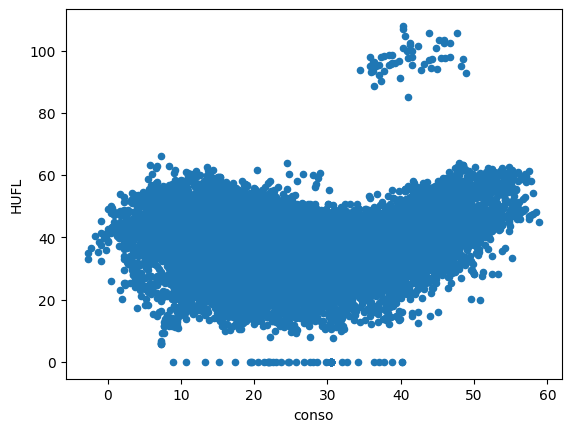

In [35]:
df.plot.scatter(x="conso", y="HUFL")


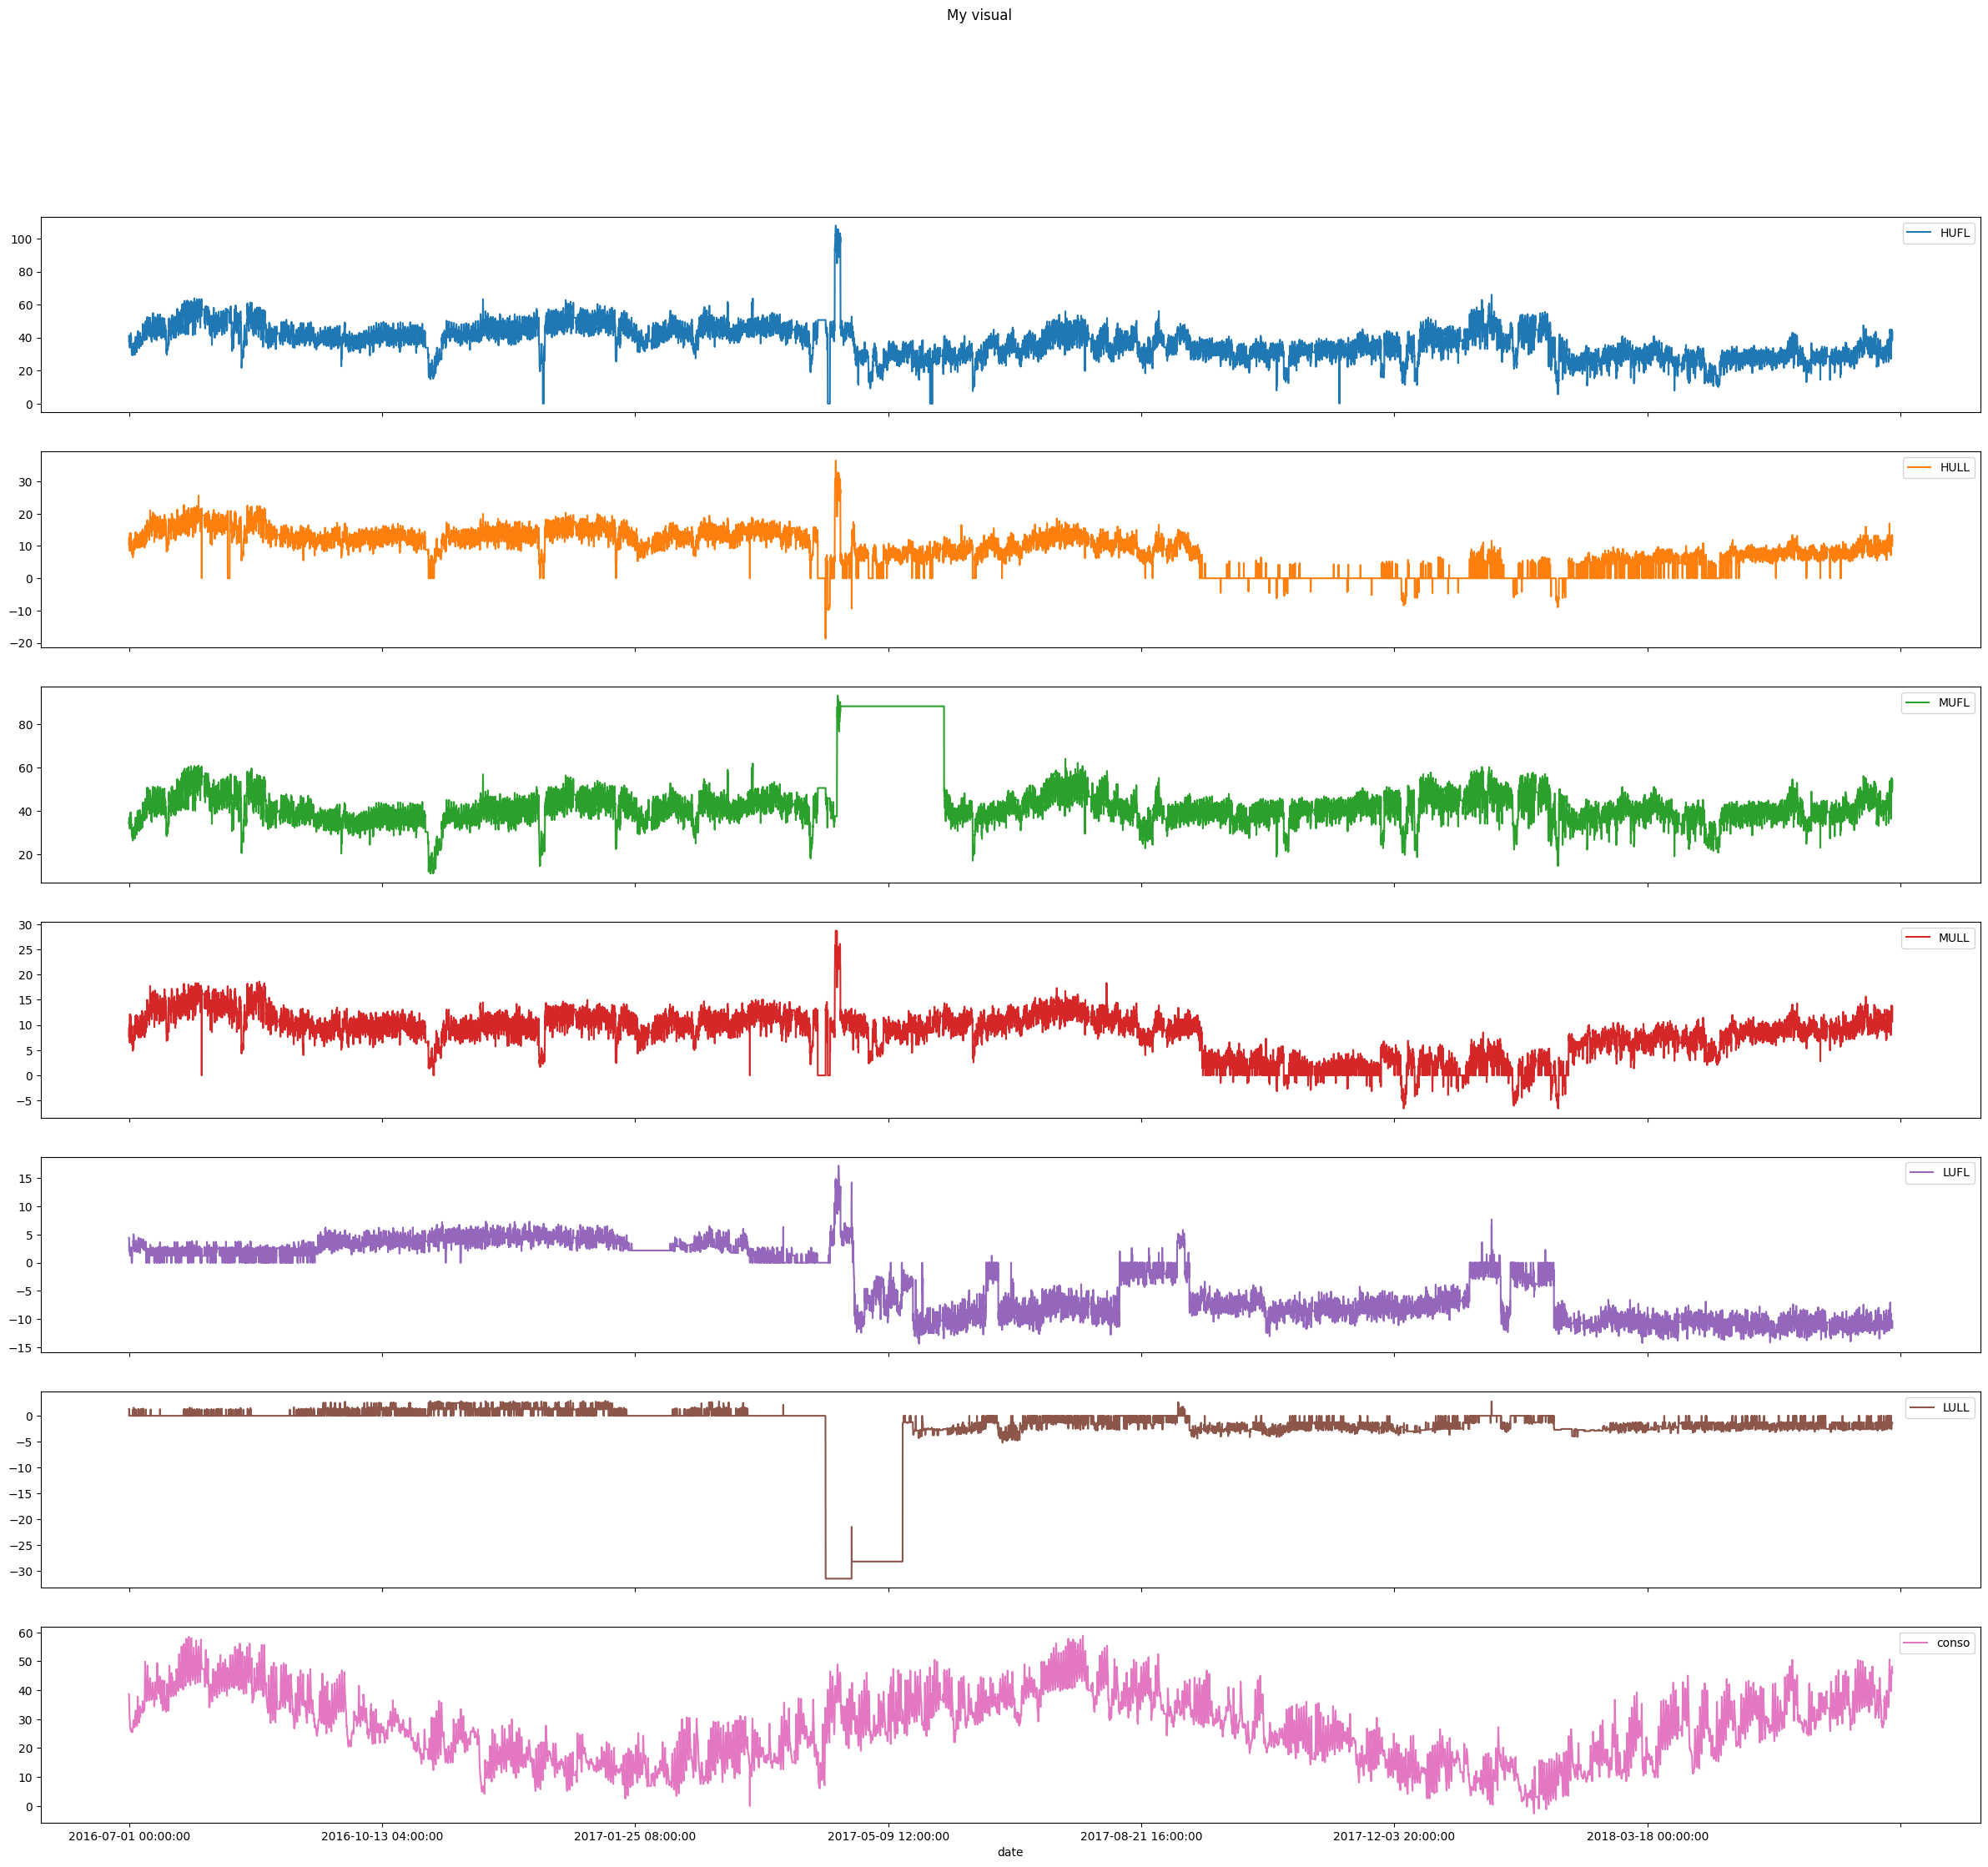

In [36]:
df.plot(subplots=True, figsize=(30, 25), title="My visual")
plt.show()


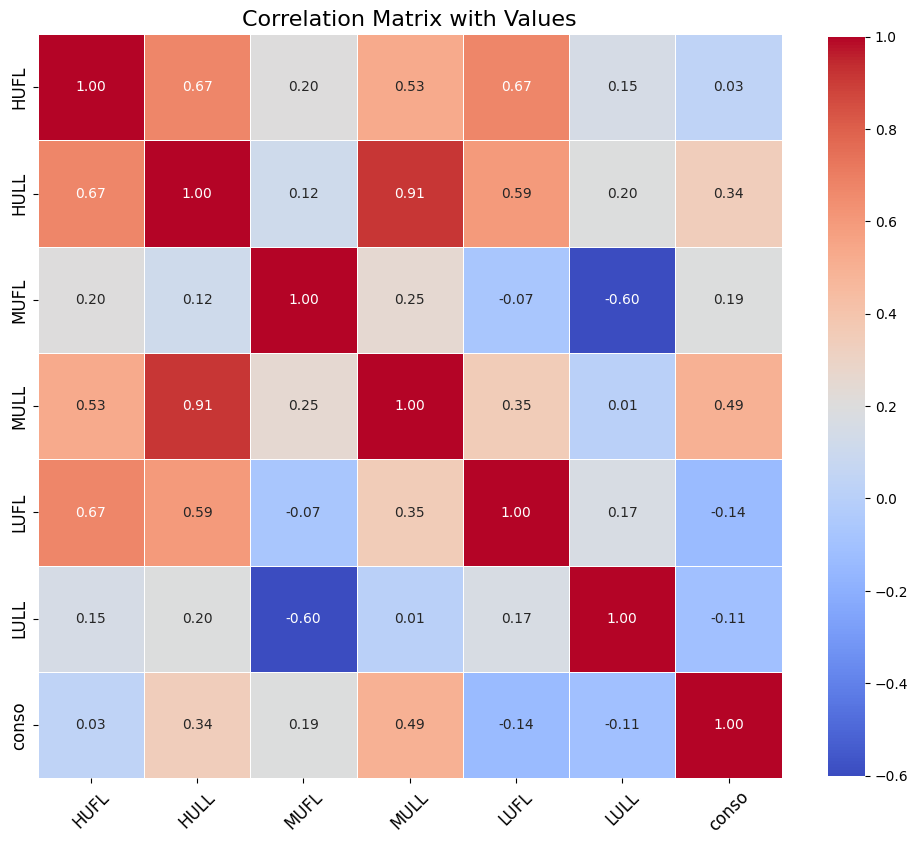

In [37]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))  # Adjust figure size
sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values on the heatmap
    fmt=".2f",             # Format values to 2 decimal places
    cmap="coolwarm",       # Diverging color map (red = negative, blue = positive)
    square=True,           # Keep cells square-shaped
    linewidths=0.5,        # Add clear grid lines between cells
    cbar_kws={"shrink": 0.8}  # Shrink the color bar
)

# Add labels and a title
plt.title("Correlation Matrix with Values", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()


In [38]:
df_ = df.copy()
save_path = "../data/raw/ettm2_data.csv"
df_.to_csv(save_path, index=True)
print(f"Processed dataset saved to {save_path}")


Processed dataset saved to ../data/raw/ettm2_data.csv


In [39]:
new_data = pd.read_csv(save_path, index_col=0)


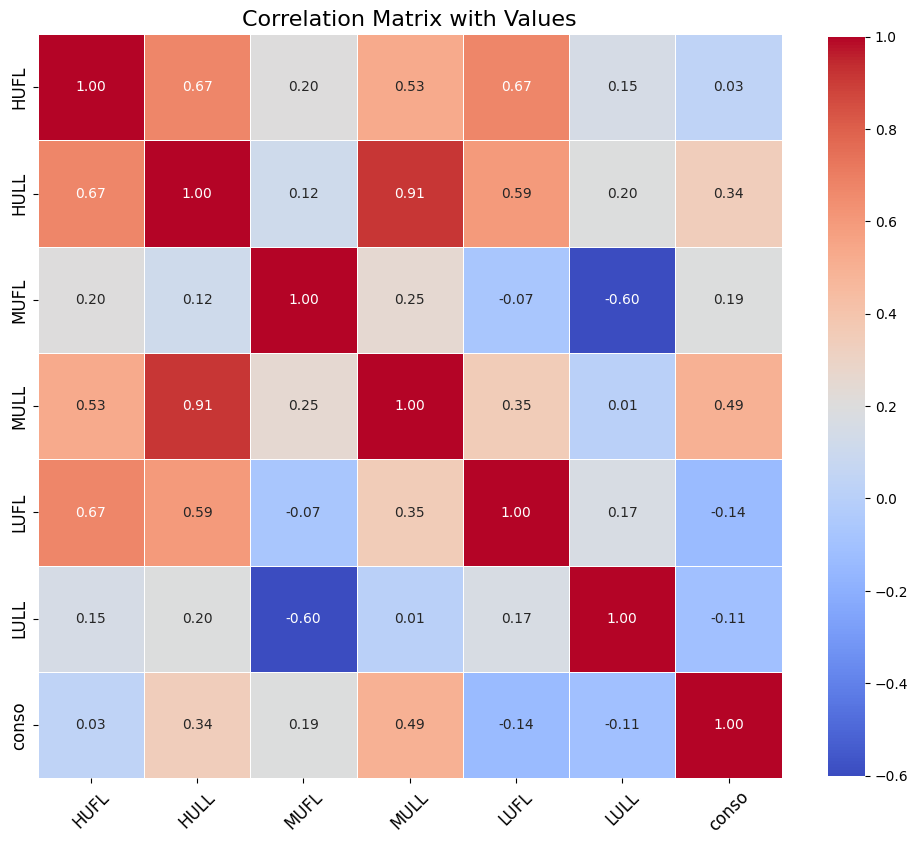

In [40]:
# Calculate the correlation matrix
corr_matrix = new_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))  # Adjust figure size
sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values on the heatmap
    fmt=".2f",             # Format values to 2 decimal places
    cmap="coolwarm",       # Diverging color map (red = negative, blue = positive)
    square=True,           # Keep cells square-shaped
    linewidths=0.5,        # Add clear grid lines between cells
    cbar_kws={"shrink": 0.8}  # Shrink the color bar
)

# Add labels and a title
plt.title("Correlation Matrix with Values", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()
